In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:\Dataset\DA\Players.csv")
df_cleaned = df.drop(columns=['image_path', 'country_image_path', 'fullname', 'updated_at'])
df_cleaned.columns = df_cleaned.columns.str.lower()
df_cleaned['battingstyle'] = df_cleaned['battingstyle'].fillna('Unknown')
df_cleaned['bowlingstyle'] = df_cleaned['bowlingstyle'].fillna('Unknown')
df_cleaned['dateofbirth'] = pd.to_datetime(df_cleaned['dateofbirth'], errors='coerce', dayfirst=True)
df_cleaned['age'] = (pd.Timestamp.now() - df_cleaned['dateofbirth']).dt.days // 365
df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())
df_cleaned['gender'] = df_cleaned['gender'].map({'m': 'Male', 'f': 'Female'})
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv("cleaned_cricket_players_dataset.csv", index=False)
df_cleaned.to_csv(r"D:\Dataset\DA\cleaned_cricket_players_dataset.csv", index=False)

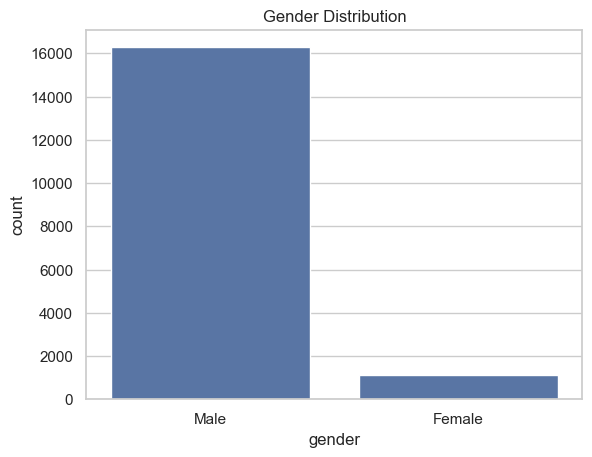

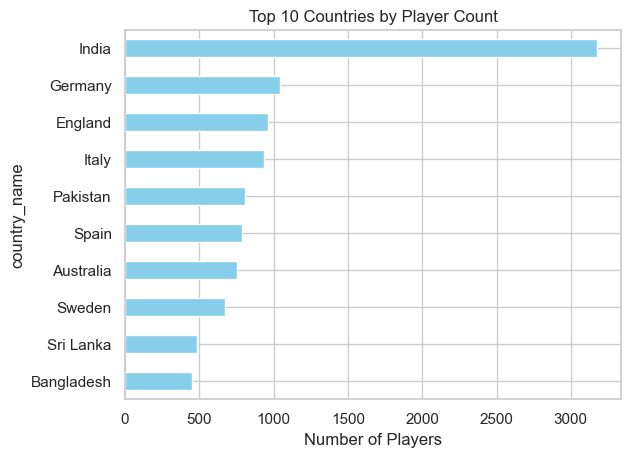

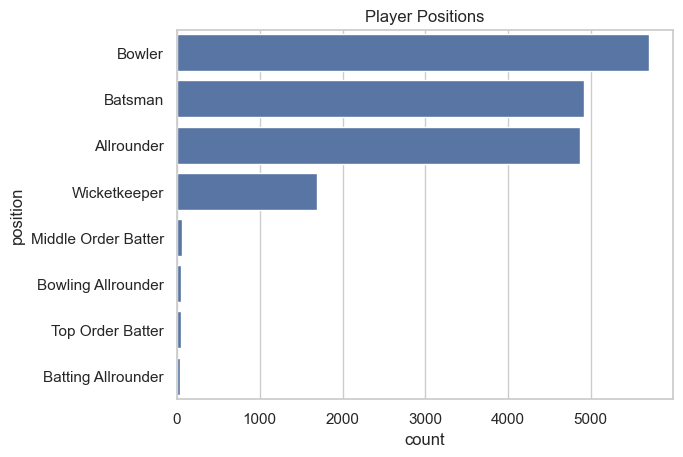

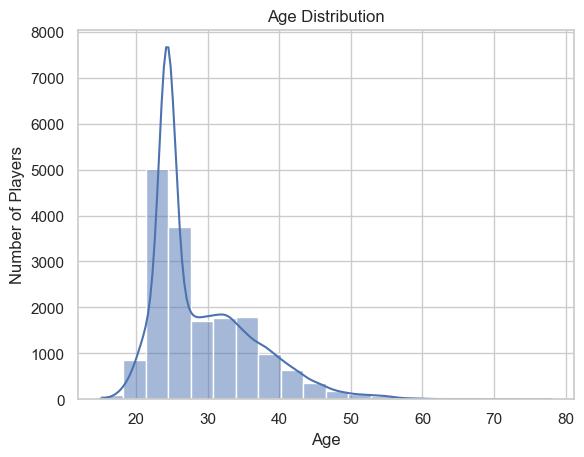

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x='gender', data=df_cleaned)
plt.title("Gender Distribution")
plt.show()
top_countries = df_cleaned['country_name'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Number of Players")
plt.gca().invert_yaxis()
plt.show()
sns.countplot(y='position', data=df_cleaned, order=df_cleaned['position'].value_counts().index)
plt.title("Player Positions")
plt.show()
sns.histplot(df_cleaned['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()

In [5]:
# Feature Engineering
df_cleaned['gender_encoded'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1})
df_cleaned['age_group'] = pd.cut(df_cleaned['age'],
                                 bins=[0, 19, 29, 39, 49, 100],
                                 labels=['<20', '20-29', '30-39', '40-49', '50+'])
df_cleaned['is_allrounder'] = df_cleaned['position'].str.contains("allrounder", case=False, na=False)
df_cleaned['position_encoded'] = df_cleaned['position'].astype('category').cat.codes